In [1]:
import pandas as pd
import numpy as np
import joblib
import gc
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

In [2]:
# Load the raw data
df = pd.read_csv("data/ratings.csv", encoding="ISO-8859-1")
# df = df[:20]

# Input- & Output-Variables
y1mos = df["MOS_Complexity"].values
y1std = df["Std_Complexity"].values
y2mos = df["MOS_Understandability"].values
y2std = df["Std_Understandability"].values
y3mos = df["MOS_Lexical_difficulty"].values
y3std = df["Std_Lexical_difficulty"].values
# free memory
del df
gc.collect()

0

## Lead Precomputed Features

In [3]:
with open('./data/preprocessed.npy', 'rb') as fp:
    feats1 = np.load(fp)
    feats2 = np.load(fp)
    feats3 = np.load(fp)
    feats4 = np.load(fp)
    feats5 = np.load(fp)
    feats6 = np.load(fp)
    feats7 = np.load(fp)
    feats8 = np.load(fp)
    feats9 = np.load(fp)

In [4]:
feats1.shape, feats2.shape, feats3.shape, feats4.shape, feats5.shape, feats6.shape

((1000, 384), (1000, 21), (1000, 16), (1000, 47), (1000, 3), (1000, 20))

In [5]:
xrnd1 = np.random.random(size=feats1.shape)
xrnd1 = (xrnd1.T / xrnd1.sum(axis=1)).T

xrnd2 = np.random.random(size=feats2.shape)
xrnd2 = (xrnd2.T / xrnd2.sum(axis=1)).T

xrnd3 = np.random.random(size=feats3.shape)
xrnd3 = (xrnd3.T / xrnd3.sum(axis=1)).T

xrnd4 = np.random.random(size=feats4.shape)
xrnd4 = (xrnd4.T / xrnd4.sum(axis=1)).T

xrnd5 = np.random.random(size=feats5.shape)
xrnd5 = (xrnd5.T / xrnd5.sum(axis=1)).T

xrnd6 = np.random.random(size=feats6.shape)
xrnd6 = (xrnd6.T / xrnd6.sum(axis=1)).T

xrnd7 = np.random.random(size=feats7.shape)
xrnd7 = (xrnd7.T / xrnd7.sum(axis=1)).T

xrnd8 = np.random.random(size=feats8.shape)
xrnd8 = (xrnd8.T / xrnd8.sum(axis=1)).T

xrnd9 = np.random.random(size=feats9.shape)
xrnd9 = (xrnd9.T / xrnd9.sum(axis=1)).T

In [6]:
xinputs0 = np.hstack([feats1, feats2, feats3, feats4, feats5, feats6, feats7, feats8, feats9])
xinputs1 = np.hstack([xrnd1, feats2, feats3, feats4, feats5, feats6, feats7, feats8, feats9])
xinputs2 = np.hstack([feats1, xrnd2, feats3, feats4, feats5, feats6, feats7, feats8, feats9])
xinputs3 = np.hstack([feats1, feats2, xrnd3, feats4, feats5, feats6, feats7, feats8, feats9])
xinputs4 = np.hstack([feats1, feats2, feats3, xrnd4, feats5, feats6, feats7, feats8, feats9])
xinputs5 = np.hstack([feats1, feats2, feats3, feats4, xrnd5, feats6, feats7, feats8, feats9])
xinputs6 = np.hstack([feats1, feats2, feats3, feats4, feats5, xrnd6, feats7, feats8, feats9])

xinputs7 = np.hstack([feats1, feats2, feats3, feats4, feats5, feats6, xrnd7, feats8, feats9])
xinputs8 = np.hstack([feats1, feats2, feats3, feats4, feats5, feats6, feats7, xrnd8, feats9])
xinputs9 = np.hstack([feats1, feats2, feats3, feats4, feats5, feats6, feats7, feats8, xrnd9])


(
    xinputs0.shape, xinputs1.shape, xinputs2.shape, xinputs3.shape, 
    xinputs4.shape, xinputs5.shape, xinputs6.shape, xinputs7.shape,
    xinputs8.shape, xinputs9.shape
)

((1000, 503),
 (1000, 503),
 (1000, 503),
 (1000, 503),
 (1000, 503),
 (1000, 503),
 (1000, 503),
 (1000, 503),
 (1000, 503),
 (1000, 503))

## Load Model

In [7]:
model = joblib.load('./models/model1-rf/model.joblib')

## Inference

In [8]:
y0 = model.predict(xinputs0)
y1 = model.predict(xinputs1)
y2 = model.predict(xinputs2)
y3 = model.predict(xinputs3)
y4 = model.predict(xinputs4)
y5 = model.predict(xinputs5)
y6 = model.predict(xinputs6)
y7 = model.predict(xinputs7)
y8 = model.predict(xinputs8)
y9 = model.predict(xinputs9)

## Sensitivity analysis on loss function

In [9]:
l0 = np.power(np.c_[y1mos, y2mos, y3mos] - y0, 2).mean(axis=0)
l1 = np.power(np.c_[y1mos, y2mos, y3mos] - y1, 2).mean(axis=0)
l2 = np.power(np.c_[y1mos, y2mos, y3mos] - y2, 2).mean(axis=0)
l3 = np.power(np.c_[y1mos, y2mos, y3mos] - y3, 2).mean(axis=0)
l4 = np.power(np.c_[y1mos, y2mos, y3mos] - y4, 2).mean(axis=0)
l5 = np.power(np.c_[y1mos, y2mos, y3mos] - y5, 2).mean(axis=0)
l6 = np.power(np.c_[y1mos, y2mos, y3mos] - y6, 2).mean(axis=0)
l7 = np.power(np.c_[y1mos, y2mos, y3mos] - y7, 2).mean(axis=0)
l8 = np.power(np.c_[y1mos, y2mos, y3mos] - y8, 2).mean(axis=0)
l9 = np.power(np.c_[y1mos, y2mos, y3mos] - y9, 2).mean(axis=0)

print(" Complexity | Understandability | Lexical")
print("  semantic: " + '  '.join([f"{x:6.4f}" for x in l1 - l0]))
print("    syntax: " + '  '.join([f"{x:6.4f}" for x in l2 - l0]))
print("  pos tags: " + '  '.join([f"{x:6.4f}" for x in l3 - l0]))
print("morph tags: " + '  '.join([f"{x:6.4f}" for x in l4 - l0]))
print(" phonetics: " + '  '.join([f"{x:6.4f}" for x in l5 - l0]))
print(" morphemes: " + '  '.join([f"{x:6.4f}" for x in l6 - l0]))
print("lemma freq: " + '  '.join([f"{x:6.4f}" for x in l7 - l0]))
print("txt length: " + '  '.join([f"{x:6.4f}" for x in l8 - l0]))
print("bigram frq: " + '  '.join([f"{x:6.4f}" for x in l9 - l0]))

 Complexity | Understandability | Lexical
  semantic: 0.2174  0.2874  0.3426
    syntax: 0.0039  0.0043  0.0049
  pos tags: 0.0157  0.0160  0.0179
morph tags: 0.0078  0.0079  0.0081
 phonetics: 0.0008  0.0011  0.0012
 morphemes: 0.0038  0.0050  0.0055
lemma freq: 0.0211  0.0226  0.0354
txt length: 2.3412  1.5246  2.1846
bigram frq: 0.0203  0.0199  0.0229


In [10]:
l0 = np.abs(np.c_[y1mos, y2mos, y3mos] - y0).mean(axis=0)
l1 = np.abs(np.c_[y1mos, y2mos, y3mos] - y1).mean(axis=0)
l2 = np.abs(np.c_[y1mos, y2mos, y3mos] - y2).mean(axis=0)
l3 = np.abs(np.c_[y1mos, y2mos, y3mos] - y3).mean(axis=0)
l4 = np.abs(np.c_[y1mos, y2mos, y3mos] - y4).mean(axis=0)
l5 = np.abs(np.c_[y1mos, y2mos, y3mos] - y5).mean(axis=0)
l6 = np.abs(np.c_[y1mos, y2mos, y3mos] - y6).mean(axis=0)
l7 = np.abs(np.c_[y1mos, y2mos, y3mos] - y7).mean(axis=0)
l8 = np.abs(np.c_[y1mos, y2mos, y3mos] - y8).mean(axis=0)
l9 = np.abs(np.c_[y1mos, y2mos, y3mos] - y9).mean(axis=0)

print(" Complexity | Understandability | Lexical")
print("  semantic: " + '  '.join([f"{x:6.4f}" for x in l1 - l0]))
print("    syntax: " + '  '.join([f"{x:6.4f}" for x in l2 - l0]))
print("  pos tags: " + '  '.join([f"{x:6.4f}" for x in l3 - l0]))
print("morph tags: " + '  '.join([f"{x:6.4f}" for x in l4 - l0]))
print(" phonetics: " + '  '.join([f"{x:6.4f}" for x in l5 - l0]))
print(" morphemes: " + '  '.join([f"{x:6.4f}" for x in l6 - l0]))
print("lemma freq: " + '  '.join([f"{x:6.4f}" for x in l7 - l0]))
print("txt length: " + '  '.join([f"{x:6.4f}" for x in l8 - l0]))
print("bigram frq: " + '  '.join([f"{x:6.4f}" for x in l9 - l0]))

 Complexity | Understandability | Lexical
  semantic: 0.1510  0.1795  0.1970
    syntax: 0.0035  0.0035  0.0033
  pos tags: 0.0110  0.0100  0.0115
morph tags: 0.0058  0.0056  0.0054
 phonetics: 0.0005  0.0010  0.0009
 morphemes: 0.0030  0.0037  0.0039
lemma freq: 0.0221  0.0228  0.0264
txt length: 0.8701  0.6453  0.8414
bigram frq: 0.0146  0.0130  0.0162


## Feature Importance

In [11]:
xnames = [f"sbert_{j}" for j in range(feats1.shape[1])] \
    + [f"nodedist_{j}" for j in range(feats2.shape[1])] \
    + [f"postag_{j}" for j in range(feats3.shape[1])] \
    + [f"morphtag_{j}" for j in range(feats4.shape[1])] \
    + [f"consonant_{j}" for j in range(feats5.shape[1])] \
    + [f"lexemes_{j}" for j in range(feats6.shape[1])] \
    + [f"frequency_{j}" for j in range(feats7.shape[1])] \
    + [f"length_{j}" for j in range(feats8.shape[1])] \
    + [f"bigram_{j}" for j in range(feats9.shape[1])] 

df_fi = pd.DataFrame(index=xnames, data=model.feature_importances_, columns=["fi"])
df_fi = df_fi.sort_values(by="fi", ascending=False)
df_fi.head(20)

,fi
length_1,0.604296
sbert_156,0.017053
frequency_2,0.015181
sbert_173,0.009544
sbert_69,0.007764
sbert_329,0.007674
sbert_68,0.007444
sbert_211,0.006375
bigram_0,0.005832
sbert_265,0.005737


## Scores vs Text Length

In [12]:
# # length_0
# plt.scatter(feats8[:,0], y1mos, marker='.');
# # plt.scatter(feats8[:,0], y2mos, marker='*');
# # plt.scatter(feats8[:,0], y3mos, marker=',');
# plt.ylabel("complexity scores [1-7]");
# plt.xlabel("log of the number of words per sentence");

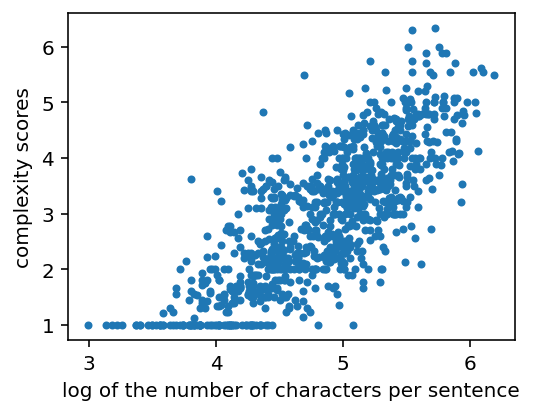

In [13]:
plt.figure(figsize=(4,3), dpi=144);
plt.scatter(feats8[:,1], y1mos, marker='.');
# plt.scatter(feats8[:,1], y2mos, marker='.');
# plt.scatter(feats8[:,1], y3mos, marker='.');
plt.ylabel("complexity scores");
plt.xlabel("log of the number of characters per sentence");

In [14]:
scipy.stats.pearsonr(feats8[:,1], y1mos)

(0.7774113943170912, 3.6264763898258184e-203)

## Correlations

In [15]:
np.corrcoef(np.c_[y1mos, y2mos, y3mos], rowvar=False)

array([[1.        , 0.89598348, 0.90518689],
       [0.89598348, 1.        , 0.93461015],
       [0.90518689, 0.93461015, 1.        ]])

In [16]:
np.corrcoef(y0, rowvar=False)

array([[1.        , 0.99054016, 0.98847129],
       [0.99054016, 1.        , 0.99676534],
       [0.98847129, 0.99676534, 1.        ]])

In [17]:
# semantic
(np.corrcoef(y1, rowvar=False) - np.corrcoef(y0, rowvar=False)).round(4)

array([[-0.    ,  0.0066,  0.004 ],
       [ 0.0066, -0.    ,  0.0012],
       [ 0.004 ,  0.0012,  0.    ]])

In [18]:
# syntactic (node vs token distance)
(np.corrcoef(y2, rowvar=False) - np.corrcoef(y0, rowvar=False)).round(4)

array([[0.    , 0.0001, 0.0001],
       [0.0001, 0.    , 0.    ],
       [0.0001, 0.    , 0.    ]])

In [19]:
# pos tags
(np.corrcoef(y3, rowvar=False) - np.corrcoef(y0, rowvar=False)).round(4)

array([[ 0.    , -0.0004, -0.0005],
       [-0.0004, -0.    ,  0.0001],
       [-0.0005,  0.0001, -0.    ]])

In [20]:
# morph tags
(np.corrcoef(y4, rowvar=False) - np.corrcoef(y0, rowvar=False)).round(4)

array([[-0.    ,  0.0002,  0.    ],
       [ 0.0002,  0.    ,  0.0001],
       [ 0.    ,  0.0001,  0.    ]])

In [21]:
# phonetics (consonant clusters)
(np.corrcoef(y5, rowvar=False) - np.corrcoef(y0, rowvar=False)).round(4)

array([[ 0.    , -0.0001, -0.0001],
       [-0.0001,  0.    , -0.    ],
       [-0.0001, -0.    ,  0.    ]])

In [22]:
# morphemes/lexemes
(np.corrcoef(y6, rowvar=False) - np.corrcoef(y0, rowvar=False)).round(4)

array([[ 0.    ,  0.0002,  0.    ],
       [ 0.0002,  0.    ,  0.    ],
       [ 0.    ,  0.    , -0.    ]])

In [23]:
# lemma freq
(np.corrcoef(y7, rowvar=False) - np.corrcoef(y0, rowvar=False)).round(4)

array([[ 0.    , -0.0008, -0.0001],
       [-0.0008,  0.    ,  0.0001],
       [-0.0001,  0.0001,  0.    ]])

In [24]:
# txt length
(np.corrcoef(y8, rowvar=False) - np.corrcoef(y0, rowvar=False)).round(4)

array([[0.    , 0.006 , 0.0086],
       [0.006 , 0.    , 0.0009],
       [0.0086, 0.0009, 0.    ]])

In [25]:
# bi-gram frequency
(np.corrcoef(y9, rowvar=False) - np.corrcoef(y0, rowvar=False)).round(4)

array([[-0.    , -0.0001, -0.0004],
       [-0.0001, -0.    ,  0.0001],
       [-0.0004,  0.0001,  0.    ]])